In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,train_test_split

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson,jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import shapiro


import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("./Data/advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [5]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [62]:
# No missing values 


In [6]:
# Univariate
data.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [64]:
# newspaper is right skewed

<Axes: >

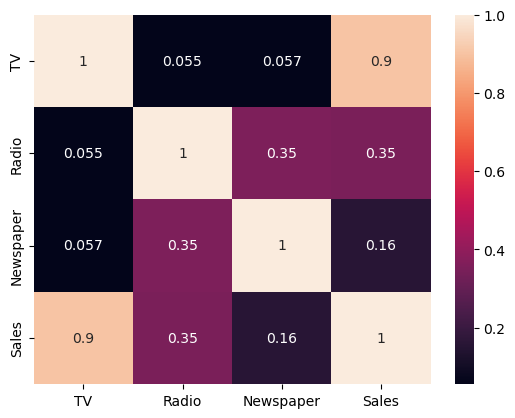

In [7]:
# Bivariate
sns.heatmap(data.corr(), annot=True)

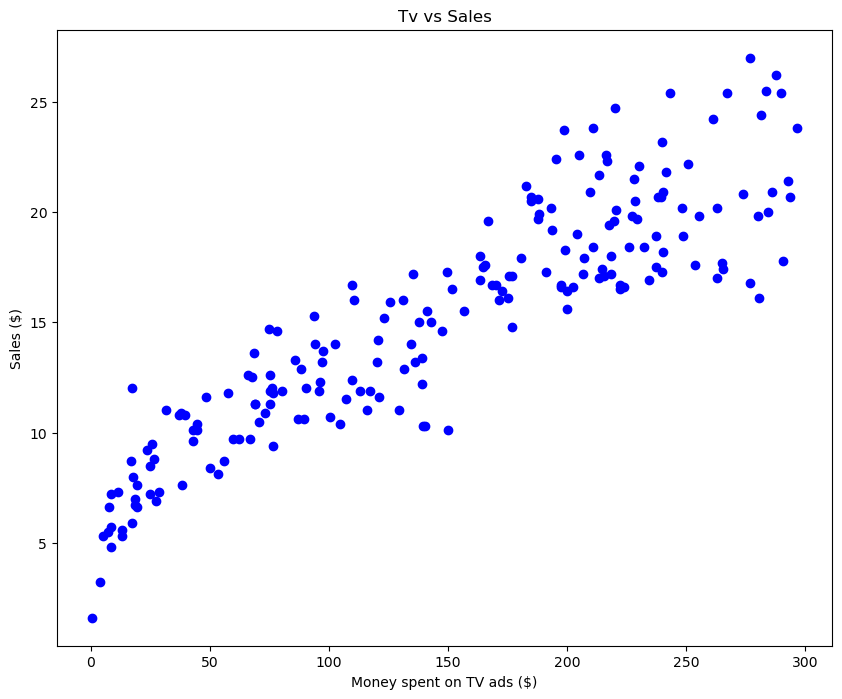

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.title("Tv vs Sales")
plt.show()

In [9]:
y=data.Sales
X=data.drop('Sales',axis=1)

In [12]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


## Simple linear regression 

In [20]:
X = data.TV
X_c = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_c,y,test_size=.2,random_state=10)

In [21]:
print(X)
print(X_c)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
     const     TV
0      1.0  230.1
1      1.0   44.5
2      1.0   17.2
3      1.0  151.5
4      1.0  180.8
..     ...    ...
195    1.0   38.2
196    1.0   94.2
197    1.0  177.0
198    1.0  283.6
199    1.0  232.1

[200 rows x 2 columns]


In [22]:
# OLS (Statsmodels) - Ordinary Least Square 
model1 = sm.OLS(y_train,X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     664.5
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.76e-58
Time:                        15:21:06   Log-Likelihood:                -351.10
No. Observations:                 160   AIC:                             706.2
Df Residuals:                     158   BIC:                             712.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9948      0.353     19.804      0.0

In [23]:
# 1st part of the table
# DF
# F stat
# Measures of variations :(Explained + unexplained variations)

In [24]:
#predictions
y_pred = model1.predict(X_test)
print(y_pred)


59     18.524475
5       7.470840
20     18.945826
198    22.513633
52     18.836384
19     15.055165
162    17.304197
55     17.878767
69     18.858272
2       7.935968
98     22.847431
10     10.611823
75      7.919552
142    19.060740
124    19.553229
63     12.614611
109    20.970502
78      7.290261
111    20.220824
185    18.212565
154    17.271365
130     7.033072
61     21.293355
87     13.052378
102    22.327582
121     8.023522
136     8.395624
1       9.429850
47     20.122327
172     8.067298
159    14.201518
39     19.471147
76      8.499594
91      8.559787
35     22.902152
178    22.136058
127    11.383389
169    22.551937
46     11.903238
174    19.164710
dtype: float64


In [25]:
#SST

SST = np.sum(( y_test - np.mean(y_test))**2)
print(SST)
#SSE

SSE = np.sum((y_test - y_pred) **2 )
print(SSE)

#SSR

SSR = np.sum( (y_pred - np.mean(y_test))**2 )
print(SSR)


1598.32775
291.496142324697
1218.4192022002967


In [26]:
SSR + SSE

1509.9153445249938

In [74]:
#2nd part of the table
# Coefficients
# std error
# t- stat
# P values
# confidance Interval

In [5]:
# Error metrics

# RMSE

# MAPE


In [83]:
# if categorical?  

## Multiple linear regression 

In [29]:
y = data.Sales
X = data.drop('Sales', axis = 1)
X_c = sm.add_constant(X) 
X_train, X_test, y_train, y_test = train_test_split(X_c, y, test_size=0.2, random_state=1)
model2 = sm.OLS(y_train, X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     498.2
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.17e-79
Time:                        15:26:56   Log-Likelihood:                -309.12
No. Observations:                 160   AIC:                             626.2
Df Residuals:                     156   BIC:                             638.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6376      0.335     13.829      0.0

In [30]:
y = data.Sales
X = data.drop(['Newspaper', 'Sales'], axis = 1)
X_c = sm.add_constant(X) 
X_train, X_test, y_train, y_test = train_test_split(X_c, y, test_size=0.2, random_state=1)
model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     752.0
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           3.80e-81
Time:                        15:27:07   Log-Likelihood:                -309.13
No. Observations:                 160   AIC:                             624.3
Df Residuals:                     157   BIC:                             633.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6238      0.317     14.593      0.0

In [117]:
#train test split


In [119]:
# Adjusted r-square

In [32]:
stat, pval = linear_rainbow(model3,frac=.3)
pval

0.9883548718357295

In [120]:
#3rd part of the table-----Assumptions

#1. linearity
# ccorrelation function
# scatter plot
# Linear rainbow test


In [123]:
#pairplot

In [124]:
#2. Multi colinearity
# Correlation function
# VIF
# Condition number

In [33]:
vif_val = [vif(X.values,i) for i in range(X.shape[1])]
VIF = pd.DataFrame()
VIF['feat'] = X.columns
VIF['vif'] = vif_val

VIF.sort_values('vif',ascending=False)


,feat,vif
0,TV,2.238085
1,Radio,2.238085


In [127]:
#3. Normality of residuals
# plots
# Shapiro wilk test
# Jerque bera test

In [6]:

#Shapiro
#H0: skewness=0
#H1: skewneas!=0



In [7]:
#jarque_bera
#H0: skewness=0
#H1: skewneas!=0


In [132]:
#4. Heteroskadasticity
# residual plot
# breusch pagan test

In [8]:
#breusch pagan test
#H0: Signifies that Homoscedasticity is present.
#Ha: Signifies that the Homoscedasticity is not present (i.e. heteroscedasticity exists)



In [89]:
#5. auto corelation
# Residual plot
# Durbin watson test

In [9]:
#durbin watson
#H0 (null hypothesis): There is no correlation among the residuals.
#HA (alternative hypothesis): The residuals are autocorrelated.


In [ ]:
#1.5 to 2.5 is allowable range
# 0 to 2 the range for positive corrleation
# 2 to 4 for negative co-rrelation

# Feature Engineering - Model Tuning

In [37]:
notes = """
Feature Engineering
    Feature Selection
        Filter Method
            Drop()
            Transformation
        Wrapper Method
            Sequential Feature Selection
                Forward Selection
                Backward elimination
                Recursive feature selection
        Embedded Methods
    Feature Creation
    Cleaning the features
        missing value
        outlier treatment
        FDA
        Scaling
"""        

## SKlearn function


In [38]:
# cross validation

In [92]:
# bias variance tradeoff